# NBA Score Growth and 3-Pointers Analysis

## 1. Reading Data

In [3]:
import pandas as pd

# I want to see ALL columns in the notebook to pick the ones I need
pd.set_option('display.max_columns', None)

# I know that we will group data by game date, so I parse it to datetime right away
df = pd.read_csv('./Datasets/NBA Database Datasets/game.csv', parse_dates=['game_date'])

df.shape

(65698, 55)

In [4]:
df.head()


,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01,HUS vs. NYK,L,0,25.0,NaN,NaN,NaN,NaN,NaN,16.0,29.0,0.552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,-2,0,1610612752,NYK,New York Knicks,NYK @ HUS,W,24.0,NaN,NaN,NaN,NaN,NaN,20.0,26.0,0.769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02,BOM vs. PIT,W,0,20.0,59.0,0.339,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,56.0,5,0,1610610031,PIT,Pittsburgh Ironmen,PIT @ BOM,L,16.0,72.0,0.222,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02,PRO vs. BOS,W,0,21.0,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,6,0,1610612738,BOS,Boston Celtics,BOS @ PRO,L,21.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02,CHS vs. NYK,W,0,21.0,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,63.0,16,0,1610612752,NYK,New York Knicks,NYK @ CHS,L,16.0,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02,DEF vs. WAS,L,0,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,-17,0,1610610036,WAS,Washington Capitols,WAS @ DEF,W,18.0,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season


In [5]:
df.tail()


,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,video_available_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
65693,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07,MIA vs. DEN,L,240,34.0,92.0,0.370,11.0,35.0,0.314,15.0,19.0,0.789,10.0,23.0,33.0,20.0,7.0,3.0,4.0,22.0,94.0,-15,1,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,41.0,80.0,0.513,5.0,18.0,0.278,22.0,27.0,0.815,13.0,45.0,58.0,28.0,3.0,5.0,14.0,18.0,109.0,15,1,Playoffs
65694,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09,MIA vs. DEN,L,240,35.0,78.0,0.449,8.0,25.0,0.320,17.0,20.0,0.850,8.0,29.0,37.0,23.0,2.0,3.0,15.0,19.0,95.0,-13,1,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,39.0,79.0,0.494,14.0,28.0,0.500,16.0,21.0,0.762,5.0,29.0,34.0,26.0,11.0,7.0,8.0,18.0,108.0,13,1,Playoffs
65695,42022,1610612743,DEN,Denver Nuggets,42200405,2023-06-12,DEN vs. MIA,W,240,38.0,84.0,0.452,5.0,28.0,0.179,13.0,23.0,0.565,11.0,46.0,57.0,21.0,6.0,7.0,15.0,13.0,94.0,5,1,1610612748,MIA,Miami Heat,MIA @ DEN,L,33.0,96.0,0.344,9.0,35.0,0.257,14.0,16.0,0.875,11.0,33.0,44.0,18.0,9.0,7.0,8.0,21.0,89.0,-5,1,Playoffs
65696,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19,LBN vs. GNS,L,221,79.0,132.0,0.598,17.0,60.0,0.283,0.0,0.0,NaN,13.0,32.0,45.0,49.0,7.0,2.0,10.0,5.0,175.0,-9,1,1610616833,GNS,Team Giannis,GNS @ LBN,W,76.0,123.0,0.618,29.0,66.0,0.439,3.0,4.0,0.750,10.0,36.0,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,1,All-Star
65697,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19,LBN vs. GNS,L,221,79.0,132.0,0.598,17.0,60.0,0.283,0.0,0.0,NaN,13.0,32.0,45.0,49.0,7.0,2.0,10.0,5.0,175.0,-9,1,1610616833,GNS,Team Giannis,GNS @ LBN,W,76.0,123.0,0.618,29.0,66.0,0.439,3.0,4.0,0.750,10.0,36.0,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,1,All Star


## 2. Taking Only "Official" Games

In [6]:
df['season_type'].value_counts()


season_type
Regular Season    60192
Playoffs           3842
Pre Season         1536
All Star             65
All-Star             63
Name: count, dtype: int64

In [7]:
df_games = df[df['season_type'].isin(['Regular Season', 'Playoffs'])]
df_games.shape

(64034, 55)

## 3. Columns: Only Ones We Need


In [8]:
df_games = df_games.loc[:, ['game_date', 'pts_home', 'pts_away', 'fg3m_home', 'fg3a_home', 'fg3m_away', 'fg3a_away']]
df_games.head()

,game_date,pts_home,pts_away,fg3m_home,fg3a_home,fg3m_away,fg3a_away
0,1946-11-01,66.0,68.0,NaN,NaN,NaN,NaN
1,1946-11-02,56.0,51.0,NaN,NaN,NaN,NaN
2,1946-11-02,59.0,53.0,NaN,NaN,NaN,NaN
3,1946-11-02,63.0,47.0,NaN,NaN,NaN,NaN
4,1946-11-02,33.0,50.0,NaN,NaN,NaN,NaN


## 4. Columns: Game Year instead of Game Date

In [9]:
df_games.insert(0, 'game_year', df_games['game_date'].dt.year)
df_games = df_games.drop('game_date', axis=1)
df_games.head()

,game_year,pts_home,pts_away,fg3m_home,fg3a_home,fg3m_away,fg3a_away
0,1946,66.0,68.0,NaN,NaN,NaN,NaN
1,1946,56.0,51.0,NaN,NaN,NaN,NaN
2,1946,59.0,53.0,NaN,NaN,NaN,NaN
3,1946,63.0,47.0,NaN,NaN,NaN,NaN
4,1946,33.0,50.0,NaN,NaN,NaN,NaN


## 5. Columns: Total Numbers, not Home/Away Teams

In [10]:
df_games.insert(3, 'total_score', df_games['pts_home'] + df_games['pts_away'])
df_games = df_games.drop(['pts_home', 'pts_away'], axis=1)
df_games.head()

,game_year,total_score,fg3m_home,fg3a_home,fg3m_away,fg3a_away
0,1946,134.0,NaN,NaN,NaN,NaN
1,1946,107.0,NaN,NaN,NaN,NaN
2,1946,112.0,NaN,NaN,NaN,NaN
3,1946,110.0,NaN,NaN,NaN,NaN
4,1946,83.0,NaN,NaN,NaN,NaN


In [11]:
df_games['fg3_made'] = df_games['fg3m_home'] + df_games['fg3m_away']
df_games['fg3_attempts'] = df_games['fg3a_home'] + df_games['fg3a_away']
df_games['fg3_pct'] = df_games['fg3_made'] / df_games['fg3_attempts']
df_games = df_games.drop(['fg3m_home', 'fg3m_away', 'fg3a_home', 'fg3a_away'], axis=1)
df_games.head()

,game_year,total_score,fg3_made,fg3_attempts,fg3_pct
0,1946,134.0,NaN,NaN,NaN
1,1946,107.0,NaN,NaN,NaN
2,1946,112.0,NaN,NaN,NaN
3,1946,110.0,NaN,NaN,NaN
4,1946,83.0,NaN,NaN,NaN


In [12]:
df_games.sort_values('fg3_pct', ascending=False)


,game_year,total_score,fg3_made,fg3_attempts,fg3_pct
18710,1985,231.0,2.0,0.0,inf
18486,1984,205.0,2.0,2.0,1.0
17966,1984,233.0,1.0,1.0,1.0
15776,1982,211.0,3.0,3.0,1.0
19696,1986,235.0,2.0,2.0,1.0
...,...,...,...,...,...
20260,1986,222.0,0.0,0.0,NaN
20475,1986,222.0,0.0,0.0,NaN
20556,1987,194.0,0.0,0.0,NaN
21927,1988,209.0,0.0,0.0,NaN


## 6. Dropping Invalid Data

In [13]:
df_games.query('fg3_attempts < fg3_made')


,game_year,total_score,fg3_made,fg3_attempts,fg3_pct
18710,1985,231.0,2.0,0.0,inf


In [14]:
df_games = df_games.drop(df_games.query('fg3_attempts < fg3_made').index)
df_games.sort_values('fg3_pct', ascending=False)

,game_year,total_score,fg3_made,fg3_attempts,fg3_pct
20030,1986,239.0,2.0,2.0,1.0
18486,1984,205.0,2.0,2.0,1.0
22351,1988,216.0,2.0,2.0,1.0
23835,1990,192.0,3.0,3.0,1.0
20032,1986,225.0,1.0,1.0,1.0
...,...,...,...,...,...
20260,1986,222.0,0.0,0.0,NaN
20475,1986,222.0,0.0,0.0,NaN
20556,1987,194.0,0.0,0.0,NaN
21927,1988,209.0,0.0,0.0,NaN


## 7. Score By Year: Plot and Insights

In [15]:
df_years = df_games.groupby('game_year')['total_score'].mean()
df_years

game_year
1946    129.507812
1947    140.691525
1948    151.726644
1949    160.364211
1950    161.536346
           ...    
2019    222.167324
2020    225.256374
2021    221.364308
2022    225.166168
2023    229.712240
Name: total_score, Length: 77, dtype: float64

<Axes: title={'center': 'NBA: Average Total Points per Game'}, xlabel='game_year'>

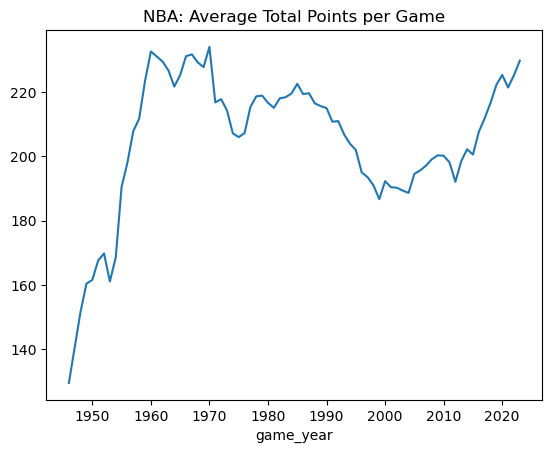

In [16]:
df_years.plot(title='NBA: Average Total Points per Game')


In [17]:
df_60s = df_games[df_games['game_year'] == 1963]
df_60s.head(5)

,game_year,total_score,fg3_made,fg3_attempts,fg3_pct
5038,1963,218.0,NaN,NaN,NaN
5039,1963,256.0,NaN,NaN,NaN
5040,1963,215.0,NaN,NaN,NaN
5041,1963,255.0,NaN,NaN,NaN
5042,1963,238.0,NaN,NaN,NaN


## 8. Three-Pointers Per Year: Plot and Insights

In [18]:
df_3pts = df_games.dropna(subset = ['fg3_made', 'fg3_attempts', 'fg3_pct'])
df_3pts.head()

,game_year,total_score,fg3_made,fg3_attempts,fg3_pct
14165,1980,211.0,0.0,2.0,0.0
14166,1980,211.0,0.0,2.0,0.0
14167,1980,212.0,1.0,5.0,0.2
14169,1980,211.0,0.0,3.0,0.0
14170,1980,230.0,0.0,8.0,0.0


In [19]:
df_3made = df_3pts.groupby('game_year')['fg3_made'].mean()
df_3made.head()

game_year
1980    0.200000
1981    0.833333
1982    1.268116
1983    1.121212
1984    1.147368
Name: fg3_made, dtype: float64

<Axes: title={'center': 'NBA: Total 3-Point Shots Made Per Game'}, xlabel='game_year'>

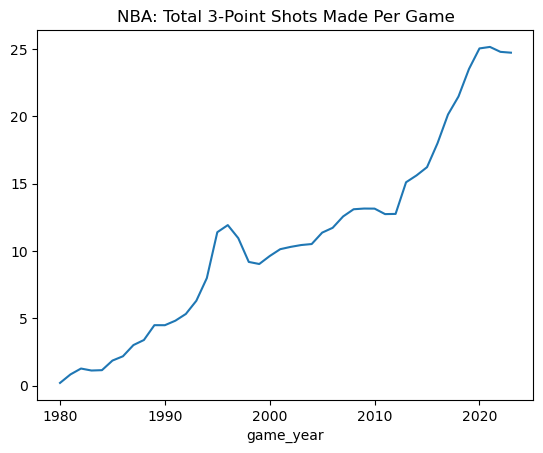

In [20]:
df_3made.plot(title='NBA: Total 3-Point Shots Made Per Game')


In [21]:
df_3attempts = df_3pts.groupby('game_year')['fg3_attempts'].mean()
df_3attempts.head()

game_year
1980    4.000000
1981    3.708333
1982    4.884058
1983    4.494949
1984    4.736842
Name: fg3_attempts, dtype: float64

In [23]:
df_3made_attempts = pd.DataFrame({
    'Shots Made': df_3made,
    'Shots Attempted': df_3attempts
})
df_3made_attempts.head(10)

,Shots Made,Shots Attempted
game_year,,
1980,0.200000,4.000000
1981,0.833333,3.708333
1982,1.268116,4.884058
1983,1.121212,4.494949
1984,1.147368,4.736842
1985,1.860465,6.769556
1986,2.179197,7.553038
1987,3.011224,9.814286
1988,3.387582,10.646284


<Axes: title={'center': 'NBA: Average 3-Point Shots Per Game'}, xlabel='game_year'>

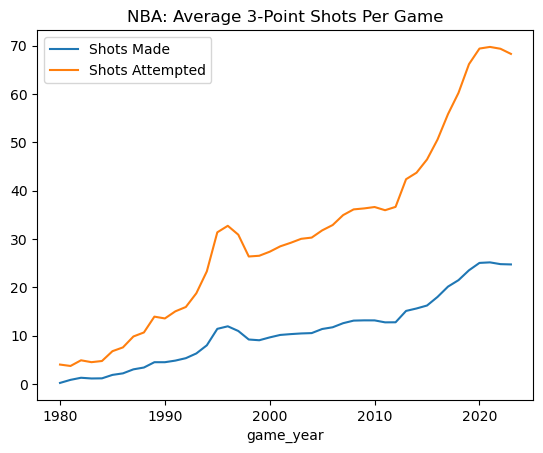

In [24]:
df_3made_attempts.plot(title='NBA: Average 3-Point Shots Per Game')


In [25]:
df_3pct = df_3pts.groupby('game_year')['fg3_pct'].mean()
df_3pct.head()

game_year
1980    0.040000
1981    0.222884
1982    0.234610
1983    0.232600
1984    0.214816
Name: fg3_pct, dtype: float64

<Axes: title={'center': 'NBA: 3-Point Shots Hit Percentage Per Game'}, xlabel='game_year'>

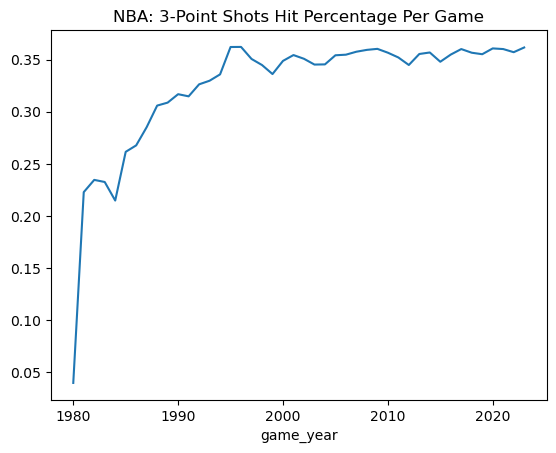

In [26]:
df_3pct.plot(title='NBA: 3-Point Shots Hit Percentage Per Game')


<Axes: title={'center': 'NBA: Average Total Points per Game'}, xlabel='game_year'>

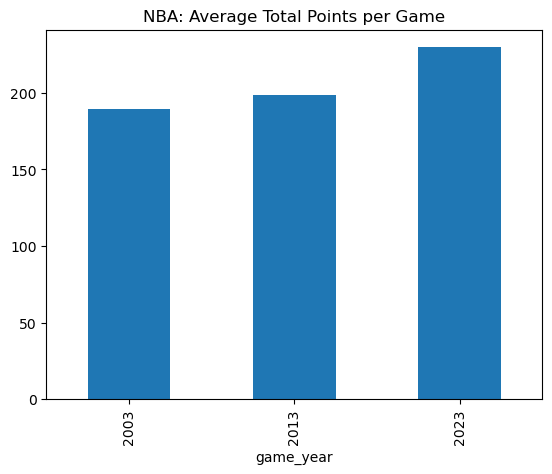

In [27]:
df1 = df_games[df_games['game_year'].isin([2003, 2013, 2023])]
df1.groupby('game_year')['total_score'].mean().plot(kind='bar', title='NBA: Average Total Points per Game')

<Axes: title={'center': 'NBA: Average Total Points per Game'}, xlabel='game_year'>

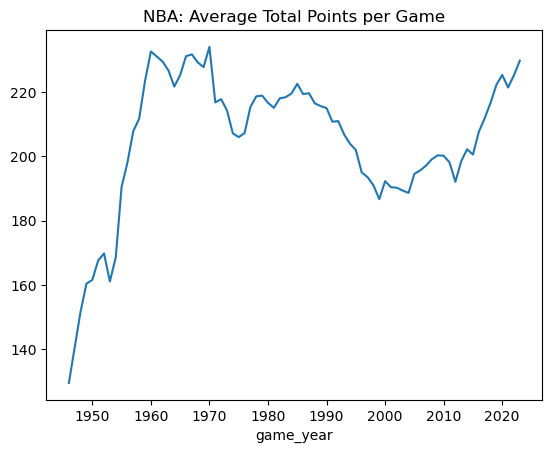

In [28]:
df_years.plot(title='NBA: Average Total Points per Game')


In [29]:
df3 = df_games[df_games['game_year'].isin([1993, 2003, 2013, 2023])]
df3_made = df3.groupby('game_year')['fg3_made'].mean().round(1)
df3_attempts = df3.groupby('game_year')['fg3_attempts'].mean().round(1)
df3_percentage = df3.groupby('game_year')['fg3_pct'].mean().round(3)

df3_total = pd.DataFrame({
    'made': df3_made,
    'attempts': df3_attempts,
    'percentage': df3_percentage
})
df3_total

,made,attempts,percentage
game_year,,,
1993,6.3,18.8,0.330
2003,10.4,30.0,0.345
2013,15.1,42.4,0.355
2023,24.7,68.3,0.362
